In [1]:
from pandas import Series, DataFrame
import pandas as pd
import re
%pylab inline
from datetime import datetime
import numpy as np
from patsy import dmatrices
import matplotlib.font_manager
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('Train_rev1.csv')

#Look at all of the column values in the first row 
display(df.iloc[0])

#This prints the first five values in the dataset
df[:5]

Id                                                             12612628
Title                                       Engineering Systems Analyst
FullDescription       Engineering Systems Analyst Dorking Surrey Sal...
LocationRaw                                     Dorking, Surrey, Surrey
LocationNormalized                                              Dorking
ContractType                                                        NaN
ContractTime                                                  permanent
Company                                    Gregory Martin International
Category                                               Engineering Jobs
SalaryRaw                                    20000 - 30000/annum 20-30K
SalaryNormalized                                                  25000
SourceName                                             cv-library.co.uk
Name: 0, dtype: object

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [3]:
import random

import nltk

from nltk import word_tokenize

from nltk.probability import FreqDist

from collections import Counter

from nltk.corpus import stopwords

In [4]:
# Draw random sample of 2500.

rows = np.random.choice(df.index.values, 2500)

words = []

for i in rows:

    words += word_tokenize(df["FullDescription"][i])

#len(words)

In [5]:
tags = nltk.pos_tag(words)

len(tags)

676991

In [6]:
# fdist = FreqDist(words)

 

# https://stackoverflow.com/questions/10674832/count-verbs-nouns-and-other-parts-of-speech-with-pythons-nltk

counts = Counter(tag for word,tag in tags) # Go through word and then tag through tags then count only the number of tags

counts

Counter({'DT': 50555,
         'NNP': 87118,
         'VBZ': 10452,
         'VBN': 11906,
         'TO': 20517,
         'VB': 32164,
         'JJ': 54784,
         'NN': 115363,
         'IN': 65393,
         'PRP$': 7525,
         'POS': 763,
         '.': 22880,
         'CD': 4641,
         'NNS': 43991,
         'VBP': 11707,
         ':': 5797,
         'VBG': 20905,
         'CC': 32132,
         'MD': 10503,
         'RB': 14452,
         ',': 23284,
         'JJR': 818,
         'PRP': 12658,
         'RBS': 189,
         'VBD': 3168,
         '(': 2386,
         ')': 2529,
         'WP': 1477,
         'JJS': 1103,
         'NNPS': 1336,
         'RP': 926,
         'WDT': 1422,
         'WRB': 934,
         'FW': 288,
         'RBR': 237,
         "''": 85,
         '``': 140,
         'EX': 273,
         'PDT': 109,
         'UH': 21,
         '$': 45,
         'WP$': 14,
         'LS': 1})

In [7]:
# https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value

# https://www.programiz.com/python-programming/methods/built-in/sorted - key

counts_sorted = sorted(counts.items(), reverse = True, key = lambda x: x[1]) # Need counts to be counts.items()

print (counts_sorted[:5]) # Top five PoS is NN, NNP, IN, JJ, and DT in that order. Frequency depicted below.

[('NN', 115363), ('NNP', 87118), ('IN', 65393), ('JJ', 54784), ('DT', 50555)]


In [8]:
# NEED TO MAKE SURE EVERYTHING IS LOWER CASE FIRST BEFOREHAND.

# Stop words is in lower case, so our words have to be lower case too. Let's not forget that.

words_lower = []

 

for word in words:

    # words_lower += word.lower() - Need to use append instead. Otherwise, adds each character.

    words_lower.append(word.lower())

 

print (words[:5])

print (words_lower[:5])

print (stopwords.words("english")[:5])

['A', 'Tier', '****', 'Support', 'Engineer']
['a', 'tier', '****', 'support', 'engineer']
['i', 'me', 'my', 'myself', 'we']


In [9]:
stops = set(stopwords.words("english")) # Makes it much faster

# https://stackoverflow.com/questions/5486337/how-to-remove-stop-words-using-nltk-or-python

filtered_words = [word for word in words_lower if word not in stops] # Faster than below since it skips a few

# steps.

In [10]:
filtered_tags = nltk.pos_tag(filtered_words)
filtered_tags
filtered_counts = Counter(tag for word, tag in filtered_tags) # Go through word and then tag through tags then count only the number of tags
filtered_counts

Counter({'NN': 161970,
         'JJ': 73564,
         'VBN': 8078,
         'RB': 13262,
         'POS': 805,
         '.': 22880,
         'VBZ': 3547,
         'VB': 10042,
         'CD': 4736,
         'NNS': 50966,
         'VBP': 12840,
         ':': 5797,
         'VBG': 24314,
         'PRP': 588,
         'IN': 5832,
         'JJR': 362,
         ',': 23284,
         'VBD': 7450,
         'MD': 2832,
         'DT': 296,
         'NNP': 4880,
         '(': 2386,
         ')': 2529,
         'CC': 1667,
         'FW': 612,
         'JJS': 1135,
         "''": 115,
         '``': 140,
         'RBR': 207,
         '$': 60,
         'RBS': 48,
         'WP': 24,
         'UH': 40,
         'RP': 73,
         'WDT': 12,
         'WP$': 14,
         'WRB': 16,
         'EX': 13,
         'PRP$': 4,
         'LS': 1,
         'NNPS': 1})

In [11]:
filtered_counts_sorted = sorted(filtered_counts.items(), reverse = True, key = lambda x: x[1]) # Need counts to be counts.items()

filtered_counts_sorted[:5] # Top five PoS is NN, JJ, NNS, VBG, and , in that order. Frequency depicted below.

#  NNP, IN, and DT drops completely from the top five, meanwhile VBG and , enter the top five.

[('NN', 161970), ('JJ', 73564), ('NNS', 50966), ('VBG', 24314), (',', 23284)]

### A2 

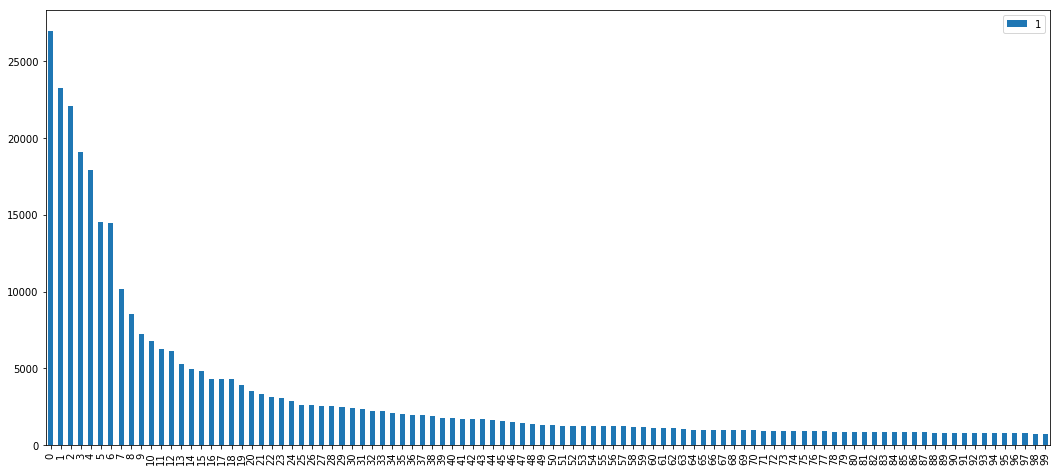

In [12]:
word_counts = Counter(word for word in words)
sorted_wc = sorted(word_counts.items(), reverse = True, key = lambda x: x[1]) # Need to indicate word_counts is an item() of key and value
sorted_wc[:100]
dfSortedWC = pd.DataFrame(sorted_wc) # Needs to be made into df to plot.
dfSortedWC[:100].plot(kind = "bar", figsize=(18,8))

In [14]:
import nltk
nltk.download('reuters')
from nltk.corpus import reuters
from nltk.corpus import wordnet

reuters_words = [w.lower() for w in reuters.words()]
words2 = set(reuters_words)
counts = [(w, reuters_words.count(w)) for w in words2]
#[(w, c) for (w, c) in counts if c > 5000]
reuters_words

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\evand\AppData\Roaming\nltk_data...


KeyboardInterrupt: 

In [ ]:
import scipy.stats as ss
 
amb = [(w, c, len(wordnet.synsets(w))) / 
    for (w, c) in counts if len(wordnet.synsets(w)) > 0]
 
amb_p_rank = ss.rankdata([p for (w, c, p) in amb])
amb_c_rank = ss.rankdata([c for (w, c, p) in amb])
 
amb_ranked = zip(amb, amb_p_rank, amb_c_rank)
 
amb_ranked[100:110]

### A3 

In [ ]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
#lem_words = wordnet_lemmatizer.lemmatize(filtered_words)


tokens = [lemma.lemmatize(word) for word in filtered_words]
prepro_text= ' '.join(tokens)

p = prepro_text.split(' ')
p

In [ ]:
Counter(p)

In [ ]:
import collections
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in p:
    if word not in wordcount:
        wordcount[word] = 1
    else:
        wordcount[word] += 1
# Print most common word
#n_print = int(input("How many most common words to print: "))
print("\n The 10 most common words are as follows\n")
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(10):
    print(word, ": ", count)
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(10)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

### B1 

In [15]:
salary_data = df.loc[rows]
salary_data

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
216010,72244007,America's Tier **** Support Engineer,A Tier **** Support Engineer is required to pr...,Dorchester Dorset South West,Dorchester,NaN,permanent,Fresh Recruits Ltd,IT Jobs,33000 per annum,33000,totaljobs.com
63665,68704724,Graduate Electronic Engineer – Power Electronics,Graduate Electronic Engineer – Power Electroni...,Wiltshire South West,Wiltshire,NaN,permanent,AES TECHNICAL & EXECUTIVE CONSULTANTS,Graduate Jobs,"From 25,000 to 30,000 per annum",27500,totaljobs.com
27734,67931879,Audit Manager,My client a high profile retail banking operat...,Gloucestershire,Gloucestershire,NaN,permanent,NaN,Accounting & Finance Jobs,"Salary - 40,800 - 50,400 plus a car allowance ...",45600,hays.co.uk
232837,72479832,Senior Production Engineer,"My client, a leading Electrical / Capital Equi...","Thames Valley,Reading,Slough,Kingston Upon Tha...",London,NaN,permanent,Michael Page Engineering Manufacture,Manufacturing Jobs,c40000-48000 + benefits,44000,jobsite.co.uk
54956,68678408,"Teaching Asisstant, Bristol",Permanent Teaching Assistant Opportunity Shire...,Bristol Avon South West,UK,NaN,permanent,Hays,Teaching Jobs,12000.00 - 13000.00 per annum,12500,totaljobs.com
193449,71767765,Traffic safety control officer,This vacancy is being advertised on the behalf...,Newcastle upon Tyne,Newcastle Upon Tyne,full_time,NaN,Spectrum HR,Other/General Jobs,16.00 per hour,30720,Jobcentre Plus
202980,71902962,"Web / Mobile Developer ( iPhone, Android, ecom...","Web / Mobile Developer ( iPhone, Android, ecom...",UK,UK,full_time,permanent,IT Executive Recruitment,IT Jobs,"From 35,000 to 55,000 per year",45000,fish4.co.uk
117895,69803775,IT Business Support Manager The Racecourse Ne...,"Our client, The Racecourse Newbury, is one of ...","Newbury, Berkshire Berkshire South East",Newbury,NaN,permanent,Conundrum Consulting Ltd,IT Jobs,"From 35,000 to 45,000 per annum Salary depende...",40000,totaljobs.com
165487,71292959,**** x Telephony Agents NO COLD CALLING,**** x Sales Contract 6 Months Belfast �**** ...,Belfast,Belfast,full_time,contract,Grafton Recruitment NI,Accounting & Finance Jobs,"10,000 - 20,000",15000,nijobfinder.co.uk
231629,72457969,"Year **** Classt Teacher, based in Brixton",A wellestablished and popular school based in ...,South East,South East London,NaN,contract,Horizon Teachers,Teaching Jobs,140.00 - 185.00 per day,39000,totaljobs.com


In [22]:
import random
np.random.seed(24)

rows = np.random.choice(df.index.values, 2500)
salary_data = df.loc[rows]

from patsy import dmatrices
from sklearn import naive_bayes
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# High = 1, Low = 0
salary_data["Salary_Class"] = 0
salary_data["Salary_Class"][salary_data["SalaryNormalized"] >= salary_data["SalaryNormalized"].quantile(.75)] = 1


Y,X = dmatrices('Salary_Class ~ 0 + FullDescription', salary_data, return_type = 'dataframe')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

model2 = naive_bayes.MultinomialNB()
model2.fit(X_train,y_train)

prediction = model2.predict(X_test)
print (metrics.accuracy_score(y_test, prediction))

print ("pred 0 1")
print (metrics.confusion_matrix(y_test, prediction, labels = [0,1]))

0.748
pred 0 1
[[561   0]
 [189   0]]


In [ ]:
import random
np.random.seed(24)

rows = np.random.choice(df.index.values, 2500)
salary_data = df.loc[rows]

from patsy import dmatrices
from sklearn import naive_bayes
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# High = 1, Low = 0
salary_data["Salary_Class"] = 0
salary_data["Salary_Class"][salary_data["SalaryNormalized"] >= salary_data["SalaryNormalized"].quantile(.75)] = 1

HighCostCities = ["London","Oxford","Brighton and Hove","Cambridge","Bristol","Portsmouth","Reading","Edinburgh","Leicester","York"]
def inHighCost(s):
    aux = s.split(" ")
    for a in aux:
        if a in HighCostCities:
            return 1
    return 0
salary_data["HighCity"] = salary_data["LocationNormalized"].map(inHighCost)


Y,X = dmatrices('Salary_Class ~ 0 + HighCity + C(ContractType) + C(ContractTime) + C(Category)', salary_data, return_type = 'dataframe')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

model = naive_bayes.MultinomialNB()
model.fit(X_train,y_train)

prediction = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction))

print ("pred 0 1")
print (metrics.confusion_matrix(y_test, prediction, labels = [0,1]))